In [16]:
import pandas as pd
import joblib
import sys
import os
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay 
import matplotlib.pyplot as plt


project_root = os.path.abspath(os.path.join(os.getcwd(), '..','..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from pytorch_tabnet.tab_model import TabNetClassifier


In [21]:
MODEL_SIZE = 'large' 
CLASSIFICATION = 'multiclass'
DATASET = 'ton'

OUTPUT_DIR = '../../src/model' 

MODEL_PATH = os.path.join(OUTPUT_DIR, f'tabnet_{CLASSIFICATION}_{MODEL_SIZE}_{DATASET}.zip')
PREPROCESSOR_PATH = os.path.join(OUTPUT_DIR, f'preprocessor_{CLASSIFICATION}_{MODEL_SIZE}_{DATASET}.pkl')
ENCODER_PATH = os.path.join(OUTPUT_DIR,f'label_encoder_{CLASSIFICATION}_{MODEL_SIZE}.pkl')
TEST_SET_PATH = '../../resources/dataset/test_set_ton.csv' 
TARGET_COLUMN = 'type' 

print(f"Model path: {MODEL_PATH}")
print(f"Preprocessor path: {PREPROCESSOR_PATH}")
print(f"Encoder path: {ENCODER_PATH}")
print(f"Test set path: {TEST_SET_PATH}")

Model path: ../../src/model/tabnet_multiclass_large_ton.zip
Preprocessor path: ../../src/model/preprocessor_multiclass_large_ton.pkl
Encoder path: ../../src/model/label_encoder_multiclass_large.pkl
Test set path: ../../resources/dataset/test_set_ton.csv


In [22]:
print("Model and preprocessor loading...")

try:
    loaded_preprocessor = joblib.load(PREPROCESSOR_PATH)

    loaded_model = TabNetClassifier()
    loaded_model.load_model(MODEL_PATH)

    print("Loaded")

except FileNotFoundError as e:
    print(f"ERROR: File not found. {e}")


Model and preprocessor loading...
Loaded


In [23]:
print("Test set and label ancoder loading")
le = joblib.load(ENCODER_PATH)

test_df = pd.read_csv(TEST_SET_PATH)

X_test = test_df.drop(columns=[TARGET_COLUMN])
y_test = test_df[TARGET_COLUMN]
y_test_encoded = le.transform(y_test)

print(f": {len(test_df)} rows.")

X_test_processed = loaded_preprocessor.transform(X_test)


Test set and label ancoder loading
: 688149 rows.


Prediciting...


/home/mat/tesi_triennale/neural-tabular-intrusion-detection-system/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mat/tesi_triennale/neural-tabular-intrusion-detection-system/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mat/tesi_triennale/neural-tabular-intrusion-detection-system/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp


  Report (Model: multiclass large)
              precision    recall  f1-score   support

        ddos       0.77      0.09      0.17     67486
         dos       0.14      0.66      0.22        35
   injection       0.92      0.62      0.74     67957
        mitm       0.00      0.00      0.00         9
      normal       0.99      0.98      0.99     12262
    password       0.84      0.83      0.83    252632
    scanning       0.78      0.95      0.86      6248
         xss       0.76      0.98      0.86    281520

    accuracy                           0.80    688149
   macro avg       0.65      0.64      0.58    688149
weighted avg       0.81      0.80      0.77    688149



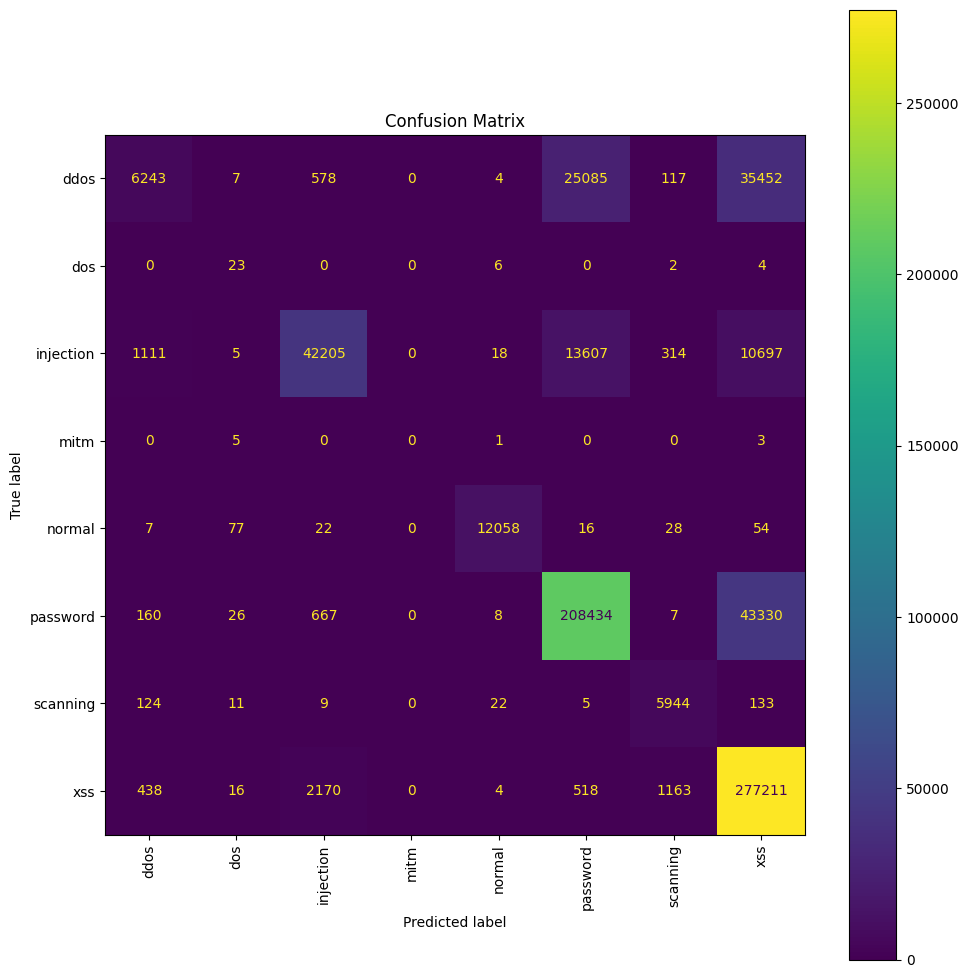

In [24]:
print("Prediciting...")
y_pred = loaded_model.predict(X_test_processed.values)

y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test_encoded)

report = classification_report(y_test_labels, y_pred_labels)

print("\n==============================================")
print(f"  Report (Model: {CLASSIFICATION} {MODEL_SIZE})")
print("==============================================")
print(report)

labels = le.classes_  # le etichette originali ordinate dallo label encoder
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=labels)

# 2. Visualizzazione a video
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 10))  # dimensione a piacere
disp.plot(ax=ax, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()